In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv('googl.txt')
#df1.index.freq = 'W'

In [2]:
df1.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954,0
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832,0
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469,0
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994,0
3332,2017-11-10,1043.87,1046.63,1041.22,1044.15,970498,0


In [3]:
df=df1[~df1['Date'].isnull()]

In [4]:
df.shape

(3333, 7)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['Date'].min()

Timestamp('2004-08-19 00:00:00')

In [7]:
indexedDataset=df.set_index(['Date'])

In [8]:
indexedDataset=indexedDataset[['Open']]

In [9]:
indexedDataset.head()

,Open
Date,
2004-08-19,50.000
2004-08-20,50.505
2004-08-23,55.375
2004-08-24,55.620
2004-08-25,52.480


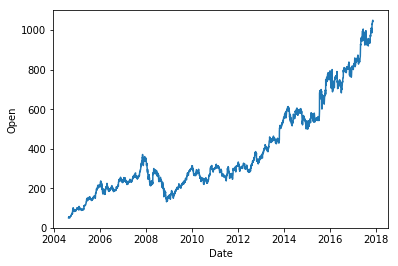

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Date')
plt.ylabel('Open')
plt.plot(indexedDataset)

In [11]:
## the mean is not constant and neither the variance
from statsmodels.tsa.stattools import adfuller
acdf_test=adfuller(indexedDataset['Open'],autolag='AIC')
df_output=pd.Series(acdf_test[0:4], index=['Test Statistic','p-value','#lags used','#nobs used'])

In [12]:
print(df_output)
for k,v in acdf_test[4].items():
    print (k,v)
    
##null hypothesis is ::: data is non-stationary
## ftr null.

Test Statistic       1.038048
p-value              0.994652
#lags used          27.000000
#nobs used        3305.000000
dtype: float64
1% -3.4323301471235474
5% -2.8624149121800033
10% -2.567235733713875


In [13]:
import numpy as np
indexedDataset_logscale=np.log(indexedDataset)

In [14]:
indexedDataset_logscale.head()

,Open
Date,
2004-08-19,3.912023
2004-08-20,3.922072
2004-08-23,4.014128
2004-08-24,4.018543
2004-08-25,3.960432


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logscale, freq=365)
#decomposition = seasonal_decompose(ts_log.price.values, freq=30)

In [16]:
trend=decomposition.trend## these steps produce indiv datasets
seasonal=decomposition.seasonal
residual=decomposition.resid

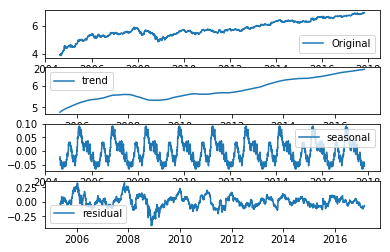

In [17]:
plt.subplot(411)
plt.plot(indexedDataset_logscale, label='Original')
plt.legend(loc='best')


plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')

In [18]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [85]:
stepwise_fit = auto_arima(indexedDataset['Open'], start_p=1, start_q=1,
                          max_p=4, max_q=4,m=12,
                           seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=24370.330, BIC=24382.546, Fit time=0.343 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=23458.833, BIC=23483.264, Fit time=6.056 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=22169.548, BIC=22193.978, Fit time=19.003 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=22171.420, BIC=22201.958, Fit time=20.456 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=24372.329, BIC=24390.652, Fit time=1.651 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=22171.417, BIC=22201.956, Fit time=53.231 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=22173.544, BIC=22210.190, Fit time=28.153 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasona

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3333
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood              -11081.071
Date:                            Tue, 17 Sep 2019   AIC                          22168.141
Time:                                    21:31:59   BIC                          22186.464
Sample:                                         0   HQIC                         22174.698
                                           - 3333                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.001      1.477      0.140      -0.001       0.005
ma.S.L12      -0.9936      0.004   -252.529      0.000      -1.001      -0.986
sigma2        45.6851      0.325    140.381      0.000      45.047      46.323
===================================================================================
Ljung-Box (Q):                       81.42   Jarque-Bera (JB):             68938.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.56   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
indexedDataset.shape

In [86]:
# Set four weeks for testing
train = indexedDataset.iloc[:3000]##can't do random bc we have to be chronological.
test = indexedDataset.iloc[3000:]##lower prediciton window to get better rmse

In [36]:
test.head()

,Open
Date,
2016-07-20,754.05
2016-07-21,757.00
2016-07-22,757.32
2016-07-25,757.68
2016-07-26,757.52


In [87]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Open'],order=(0,1,0),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False,enforce_stationarity=True)


results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               Open   No. Observations:                 3000
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood               -9850.618
Date:                            Tue, 17 Sep 2019   AIC                          19705.236
Time:                                    21:33:48   BIC                          19717.240
Sample:                                         0   HQIC                         19709.555
                                           - 3000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.0030      0.007   -140.115      0.000      -1.017      -0.989
sigma2        41.7703      0.549     76.133      0.000      40.695      42.846
===================================================================================
Ljung-Box (Q):                       76.27   Jarque-Bera (JB):             94287.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
# Obtain predicted values
start=len(train)##400 
end=len(train)+len(test)-1  ## end at 433
predictions = results.predict(start=start, end=end, dynamic=False)

In [40]:
test.tail()

,Open
Date,
2017-11-06,1049.10
2017-11-07,1049.65
2017-11-08,1050.05
2017-11-09,1048.00
2017-11-10,1043.87


In [89]:
predictions=predictions.reset_index().drop(['index'],axis=1)
predictions

,0
0,749.568271
1,750.056294
2,750.834589
3,751.186846
4,751.226213
5,750.984778
6,751.285787
7,751.801134
8,751.911290
9,751.858716


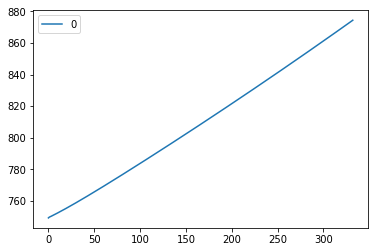

In [69]:
# Plot predictions against known values
title='Googl'
ylabel='Count'
xlabel=''

#ax = test['Open'].plot(legend=True,figsize=(12,6),title=title)
predictions[0].plot(legend=True)
#ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel)

In [101]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions')

In [100]:
test=test.reset_index()

In [102]:
predictions=pd.DataFrame(predictions)
predictions=predictions.reset_index()

In [103]:
compare=pd.DataFrame(predictions).join(test)

In [104]:
compare.head()

,index,Predictions,Date,Open
0,3000,749.568271,2016-07-20,754.05
1,3001,750.056294,2016-07-21,757.00
2,3002,750.834589,2016-07-22,757.32
3,3003,751.186846,2016-07-25,757.68
4,3004,751.226213,2016-07-26,757.52


In [105]:
compare=compare.drop(['index'],axis=1)

In [108]:
compare=compare.set_index('Date')

In [109]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

rmse =rmse(compare['Predictions'], compare['Open'])
mse = mean_squared_error(compare['Predictions'], compare['Open'])
print(f' MSE Error: {rmse:11.10}')
print(f' MSE Error: {mse:11.10}')

 MSE Error: 107.5425894
 MSE Error: 11565.40855


In [110]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(indexedDataset['Open'],order=(0,1,0),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False)
results = model.fit()
fcast = results.predict(len(indexedDataset),len(indexedDataset)+18,typ='levels').rename('SARIMA Forecast')

##add +30 instead of +18 to forecast out for the future 30 days.

In [113]:
fcast

3333    1043.346934
3334    1044.459384
3335    1045.231590
3336    1044.741393
3337    1045.190005
3338    1045.671538
3339    1046.323064
3340    1046.068144
3341    1046.465413
3342    1046.814341
3343    1048.151253
3344    1048.583025
3345    1048.059959
3346    1049.172409
3347    1049.944615
3348    1049.454418
3349    1049.903030
3350    1050.384563
3351    1051.036089
Name: SARIMA Forecast, dtype: float64

In [114]:
indexedDataset['Open']

Date
2004-08-19      50.000
2004-08-20      50.505
2004-08-23      55.375
2004-08-24      55.620
2004-08-25      52.480
2004-08-26      52.475
2004-08-27      54.050
2004-08-30      52.640
2004-08-31      51.150
2004-09-01      51.350
2004-09-02      49.595
2004-09-03      50.475
2004-09-07      50.505
2004-09-08      50.370
2004-09-09      51.265
2004-09-10      50.800
2004-09-13      53.315
2004-09-14      53.725
2004-09-15      55.280
2004-09-16      56.170
2004-09-17      57.210
2004-09-20      58.475
2004-09-21      59.905
2004-09-22      58.700
2004-09-23      59.420
2004-09-24      60.470
2004-09-27      59.780
2004-09-28      60.650
2004-09-29      63.350
2004-09-30      64.950
                ...   
2017-10-02     975.650
2017-10-03     967.560
2017-10-04     971.760
2017-10-05     972.790
2017-10-06     980.000
2017-10-09     995.000
2017-10-10     995.300
2017-10-11     989.040
2017-10-12    1003.840
2017-10-13    1009.110
2017-10-16    1009.630
2017-10-17    1007.440
2017-1

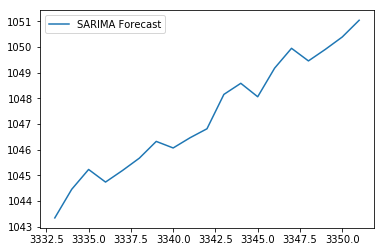

In [115]:
# Plot predictions against known values
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')
title = 'GOOGL Loan Forecast'
#ylabel='Loans Per Week'
#xlabel='' # we don't really need a label here

#ax = indexedDataset['Open'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
#ax.autoscale(axis='x',tight=True)
##ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [116]:
fcast

3333    1043.346934
3334    1044.459384
3335    1045.231590
3336    1044.741393
3337    1045.190005
3338    1045.671538
3339    1046.323064
3340    1046.068144
3341    1046.465413
3342    1046.814341
3343    1048.151253
3344    1048.583025
3345    1048.059959
3346    1049.172409
3347    1049.944615
3348    1049.454418
3349    1049.903030
3350    1050.384563
3351    1051.036089
Name: SARIMA Forecast, dtype: float64